## Preprocessing the data

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("data/SpotifyFeatures.csv").drop_duplicates(subset=['artist_name', 'track_name'])
top2017 = pd.read_csv("data/featuresdf2017.csv").drop(columns=['id', 'time_signature', 'mode'])
top2018 = pd.read_csv("data/top2018.csv").drop(columns=['id', 'time_signature', 'mode'])

In [3]:
data = data.replace({'key':{'A':0, 'A#':1, 'B':2, 'C':3, 'C#':4, 'D':5, 'D#':6, 'E':7, 'F':8, 'F#':9, 'G':10, 'G#':11}})

data['track_name'] = data['track_name'].apply(lambda x: len(x)); 
data['artist_name'] = data['artist_name'].apply(lambda x: len(x))

top2017['name'] = top2017['name'].apply(lambda x: len(x)); top2017['artists'] = top2017['artists'].apply(lambda x: len(x))
top2018['name'] = top2018['name'].apply(lambda x: len(x)); top2018['artists'] = top2018['artists'].apply(lambda x: len(x))

In [4]:
# unique tracks
data = data.drop_duplicates(subset=['track_id']).drop(columns=['genre','track_id','time_signature'])

# discard songs somewhere in between
data = data[(data['popularity'] <40) | (data['popularity'] > 60)]

# > 50 is popular 
data['popularity'] = data['popularity'].apply(lambda x: 1 if x > 60 else 0);

In [5]:
data= data.rename(columns={'artist_name':'artists', 'track_name':'name','popularity':'popularity_class'})
data = data[['name', 'artists', 'danceability', 'energy', 'key', 'loudness','speechiness', 'acousticness', 'instrumentalness', 'liveness','valence', 'tempo', 'duration_ms','popularity_class']]

In [6]:
print(f"data\t\ttop2017\n------------------------")
for a, b in zip(data.columns,top2017.columns):
    print(a,'\t\t' if len(a) < 7 else '\t' if len(a) < 14 else '',b)

data		top2017
------------------------
name 		 name
artists 	 artists
danceability 	 danceability
energy 		 energy
key 		 key
loudness 	 loudness
speechiness 	 speechiness
acousticness 	 acousticness
instrumentalness  instrumentalness
liveness 	 liveness
valence 	 valence
tempo 		 tempo
duration_ms 	 duration_ms


In [7]:
data['popularity_class'].value_counts()

0    97799
1    13320
Name: popularity_class, dtype: int64

In [8]:
top2017.head()

,name,artists,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,12,10,0.825,0.652,1.0,-3.183,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0
1,17,10,0.694,0.815,2.0,-4.328,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0
2,34,10,0.660,0.786,2.0,-4.757,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0
3,24,16,0.617,0.635,11.0,-6.769,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0
4,11,9,0.609,0.668,7.0,-4.284,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0


In [9]:
data.head()

,name,artists,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity_class
0,27,14,0.389,0.910,4,-1.828,0.0525,0.611,0.000,0.3460,0.814,166.969,99373,0
1,32,17,0.590,0.737,9,-5.559,0.0868,0.246,0.000,0.1510,0.816,174.003,137373,0
2,30,15,0.663,0.131,3,-13.879,0.0362,0.952,0.000,0.1030,0.368,99.488,170267,0
3,30,14,0.240,0.326,4,-12.178,0.0395,0.703,0.000,0.0985,0.227,171.758,152427,0
4,9,12,0.331,0.225,8,-21.150,0.0456,0.950,0.123,0.2020,0.390,140.576,82625,0


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['popularity_class']), data['popularity_class'], test_size=0.2, random_state=0)

In [11]:
from collections import Counter
Counter(y_train)

Counter({0: 78290, 1: 10605})

## Model training and initial testing

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [13]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [14]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [15]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [16]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
y_pred_rf = rf.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_dtc = dtc.predict(X_test)

print("random forest accuracy", accuracy_score(y_test, y_pred_rf))
print("k nearest neighbors accuracy", accuracy_score(y_test, y_pred_knn))
print("decision tree accuracy", accuracy_score(y_test, y_pred_dtc))

random forest accuracy 0.8933585313174947
k nearest neighbors accuracy 0.8008909287257019
decision tree accuracy 0.8359881209503239


## Cross-validation

In [19]:
from sklearn.model_selection import cross_validate

In [20]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
cv_results_rf = cross_validate(rf, data.drop(columns=['popularity_class']), data['popularity_class'], cv=5, return_train_score=True)

In [21]:
print("random forest cross-validation")
print(cv_results_rf["test_score"])
print(cv_results_rf["train_score"])
print(cv_results_rf["test_score"].mean())

random forest cross-validation
[0.8525468  0.88858891 0.81578474 0.89560835 0.88043918]
[0.999955   0.99991001 0.99991001 0.9999325  0.99996625]
0.8665935964649444


In [22]:
knn = KNeighborsClassifier(n_neighbors=1)
cv_results_knn = cross_validate(knn, data.drop(columns=['popularity_class']), data['popularity_class'], cv=5, return_train_score=True)

In [23]:
print("k nearest neighbors cross-validation")
print(cv_results_knn["test_score"])
print(cv_results_knn["train_score"])
print(cv_results_knn["test_score"].mean())

k nearest neighbors cross-validation
[0.76219402 0.82212923 0.77717783 0.80705544 0.80808172]
[0.99996625 0.99994375 0.999955   0.99996625 0.9999775 ]
0.7953276465237323


In [24]:
dtc = DecisionTreeClassifier(random_state=42)
cv_results_dtc = cross_validate(dtc, data.drop(columns=['popularity_class']), data['popularity_class'], cv=5, return_train_score=True)

In [25]:
print("decision tree cross-validation")
print(cv_results_dtc["test_score"])
print(cv_results_dtc["train_score"])
print(cv_results_dtc["test_score"].mean())

decision tree cross-validation
[0.72835673 0.83733801 0.73929086 0.83904788 0.82977096]
[0.99996625 0.99994375 0.999955   0.99996625 0.9999775 ]
0.7947608870676566


## Testing on 2017|2018 top

In [26]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [27]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [28]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [29]:
y_pred_2017_rf = rf.predict(top2017)
y_pred_2017_knn = knn.predict(top2017)
y_pred_2017_dtc = dtc.predict(top2017)

print("random forest accuracy (2017 top)", accuracy_score([1]*100, y_pred_2017_rf))
print("k nearest neighbors accuracy (2017 top)", accuracy_score([1]*100, y_pred_2017_knn))
print("decision tree accuracy (2017 top)", accuracy_score([1]*100, y_pred_2017_dtc))

random forest accuracy (2017 top) 0.7
k nearest neighbors accuracy (2017 top) 0.6
decision tree accuracy (2017 top) 0.66


In [30]:
y_pred_2018_rf = rf.predict(top2018)
y_pred_2018_knn = knn.predict(top2018)
y_pred_2018_dtc = dtc.predict(top2018)

print("random forest accuracy (2018 top)", accuracy_score([1]*100, y_pred_2018_rf))
print("k nearest neighbors accuracy (2018 top)", accuracy_score([1]*100, y_pred_2018_knn))
print("decision tree accuracy (2018 top)", accuracy_score([1]*100, y_pred_2018_dtc))

random forest accuracy (2018 top) 0.84
k nearest neighbors accuracy (2018 top) 0.74
decision tree accuracy (2018 top) 0.76


## Plots for attribute comparisons

In [31]:
rf_correct = top2018.iloc[[i for i in range(100) if y_pred_2018_rf[i] == 1],:]
rf_wrong = top2018.iloc[[i for i in range(100) if y_pred_2018_rf[i] == 0],:]

knn_correct = top2018.iloc[[i for i in range(100) if y_pred_2017_knn[i] == 1],:]
knn_wrong = top2018.iloc[[i for i in range(100) if y_pred_2017_knn[i] == 0],:]

dtc_correct = top2018.iloc[[i for i in range(100) if y_pred_2017_dtc[i] == 1],:]
dtc_wrong = top2018.iloc[[i for i in range(100) if y_pred_2017_dtc[i] == 0],:]


In [32]:
top2018.iloc[:3,:]

,name,artists,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,10,5,0.754,0.449,7.0,-9.211,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0
1,4,12,0.740,0.613,8.0,-4.880,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0
2,26,11,0.587,0.535,5.0,-6.090,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0


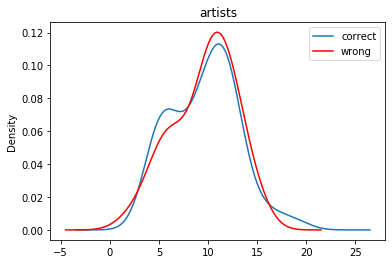

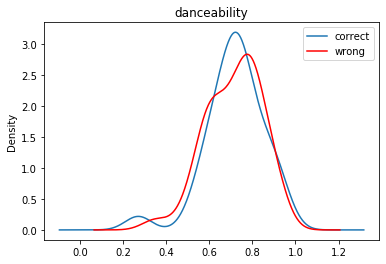

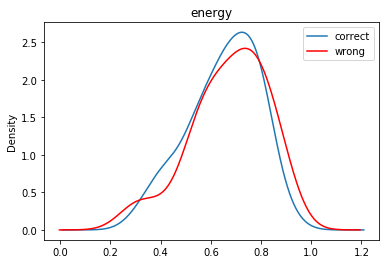

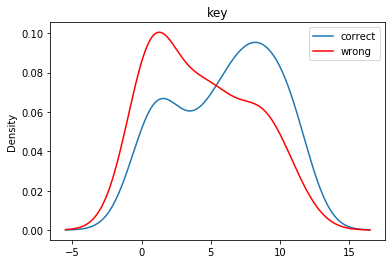

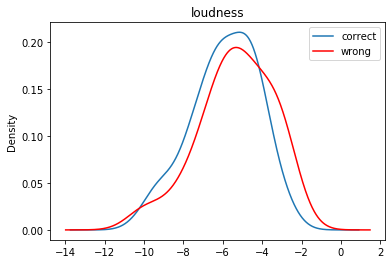

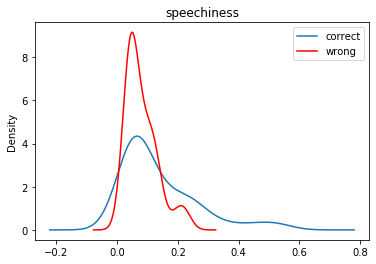

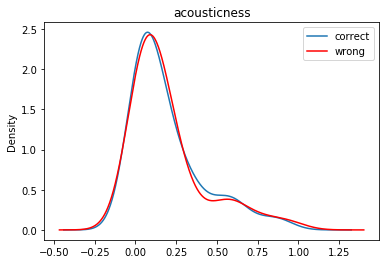

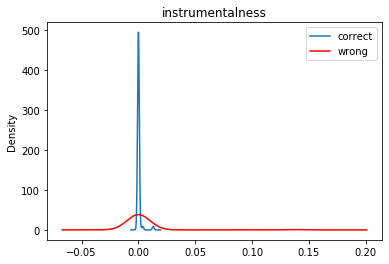

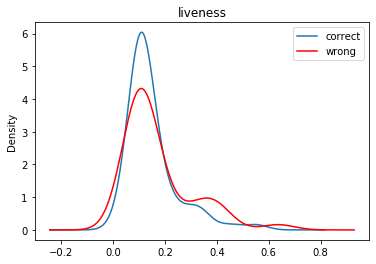

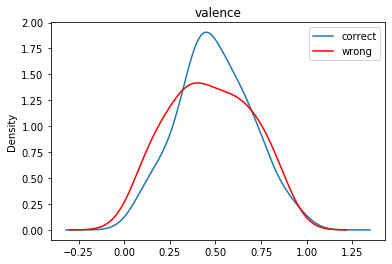

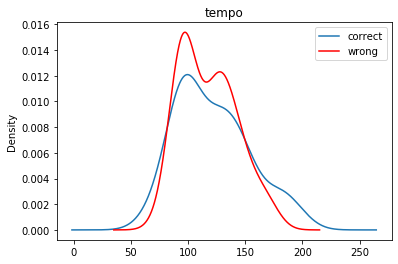

In [37]:
# predicted data
from matplotlib import pyplot as plt
for i, column in enumerate(top2017.columns[1:-1]):
    knn_correct[column].plot(kind='density', label='correct')
    knn_wrong[column].plot(kind='density', color='red', label='wrong')
    
    #rf_correct[column].plot(kind='density', label='correct')
    #rf_wrong[column].plot(kind='density', color='red', label='wrong')
   
    #dtc_correct[column].plot(kind='density', label='correct')
    #dtc_wrong[column].plot(kind='density', color='red', label='wrong')
    
    plt.legend()
    plt.title(column)
    plt.show()

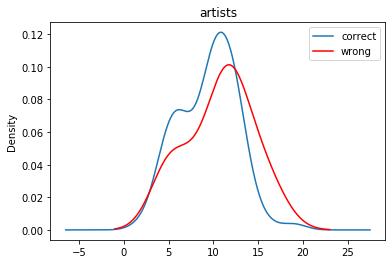

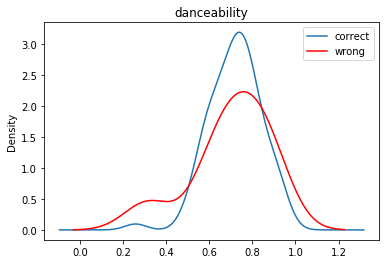

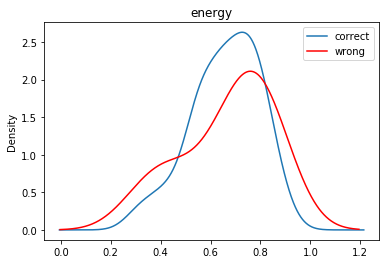

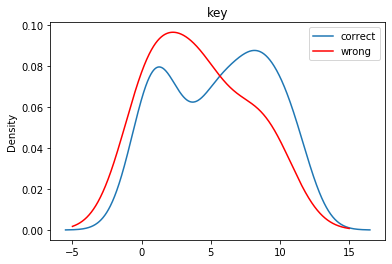

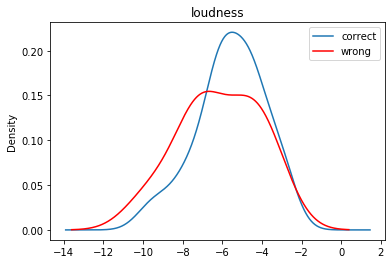

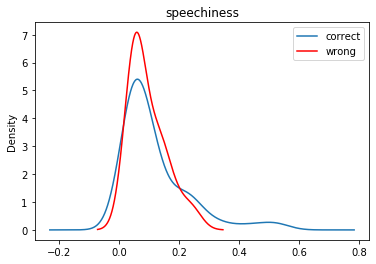

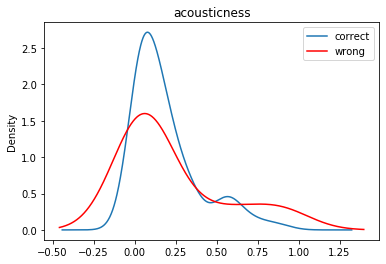

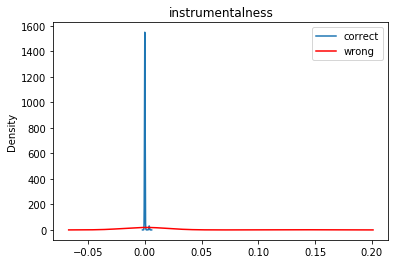

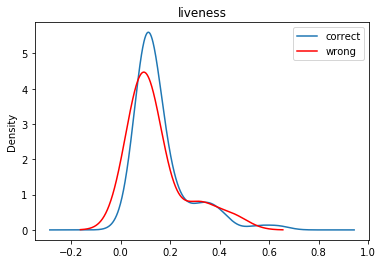

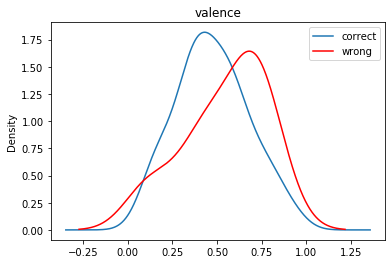

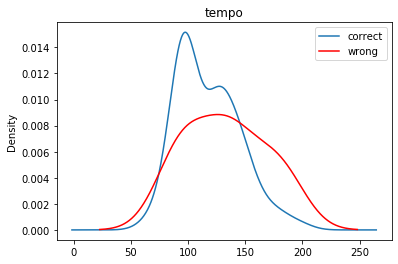

In [34]:
# predicted data
for i, column in enumerate(top2017.columns[1:-1]):
    #knn_correct[column].plot(kind='density', label='correct')
    #knn_wrong[column].plot(kind='density', color='red', label='wrong')
    
    rf_correct[column].plot(kind='density', label='correct')
    rf_wrong[column].plot(kind='density', color='red', label='wrong')
    
    #dtc_correct[column].plot(kind='density', label='correct')
    #dtc_wrong[column].plot(kind='density', color='red', label='wrong')
    
    plt.legend()
    plt.title(column)
    plt.show()

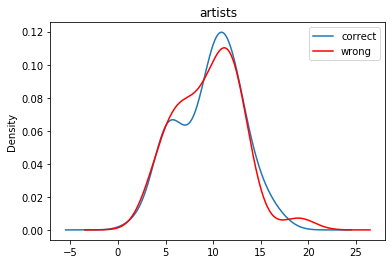

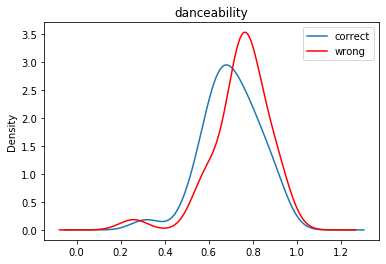

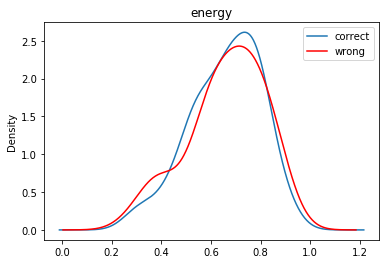

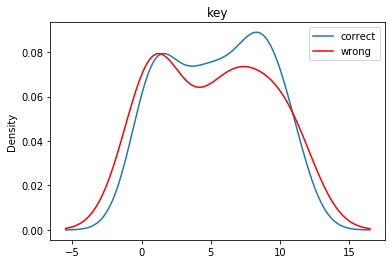

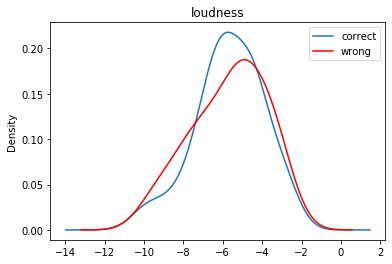

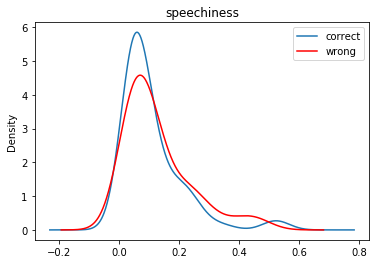

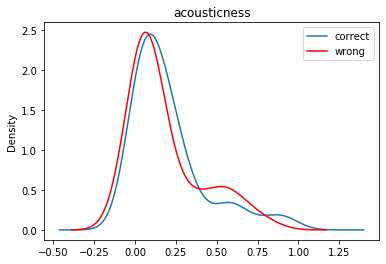

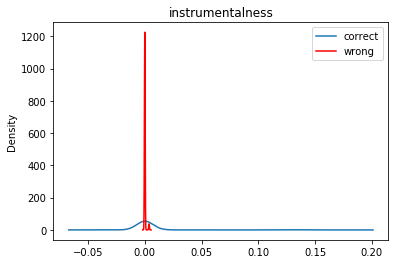

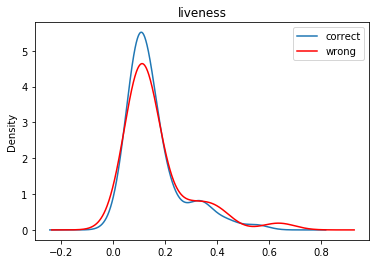

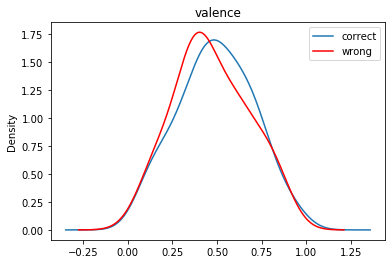

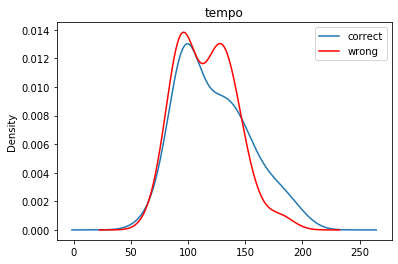

In [35]:
# predicted data
for i, column in enumerate(top2017.columns[1:-1]):
    #knn_correct[column].plot(kind='density', label='correct')
    #knn_wrong[column].plot(kind='density', color='red', label='wrong')
    
    #rf_correct[column].plot(kind='density', label='correct')
    #rf_wrong[column].plot(kind='density', color='red', label='wrong')
    
    dtc_correct[column].plot(kind='density', label='correct')
    dtc_wrong[column].plot(kind='density', color='red', label='wrong')
    
    plt.legend()
    plt.title(column)
    plt.show()

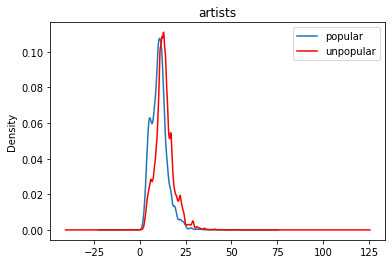

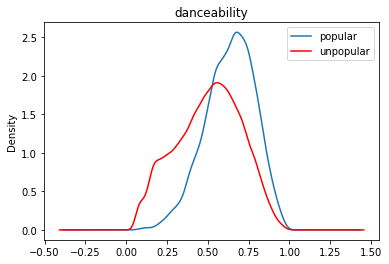

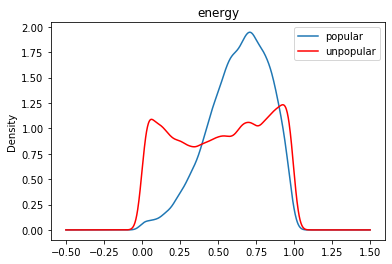

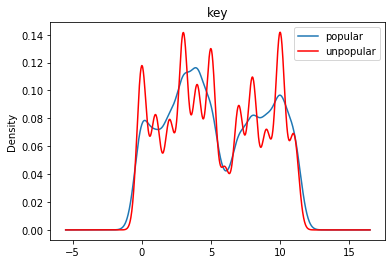

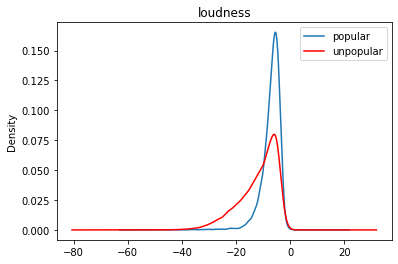

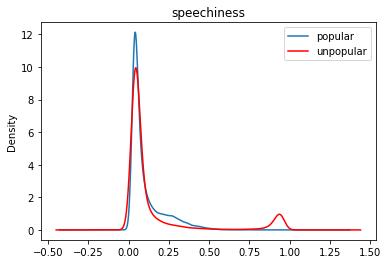

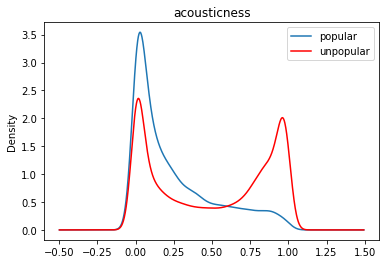

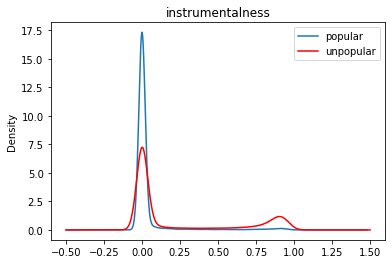

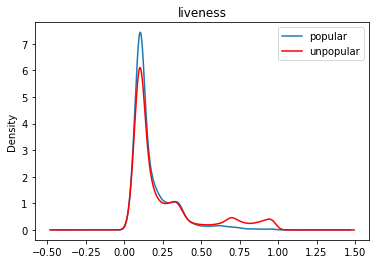

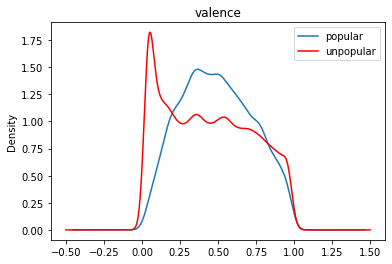

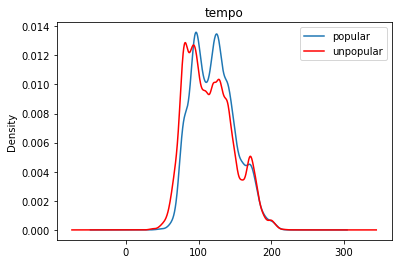

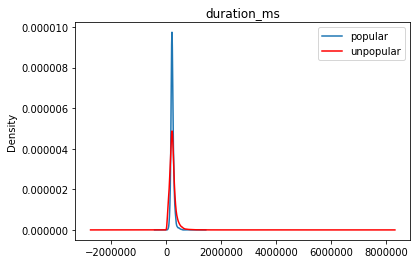

In [36]:
# all data
popular = data[data['popularity_class'] == 1]
unpopular = data[data['popularity_class'] == 0]

for i, column in enumerate(popular.columns[1:-1]):
    popular[column].plot(kind='density', label='popular')
    unpopular[column].plot(kind='density', color='red', label='unpopular')
    
    plt.legend()
    plt.title(column)
    plt.show()